<h1>PCA Training with BotNet (02-03-2018)</h1>

In [1]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gc
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
input_label = []
output_label = []
a,b = 0,0
ficheiro = open("..\\DatasetTratado\\02-03-2018.csv", "r")
nome_label = ficheiro.readline().split(",")
ficheiro.readline()
ficheiro.readline()
linha = ficheiro.readline()
while(linha != ""):
    linha = linha.split(",")
    out = linha.pop(37)
    if(out == "Benign"): 
        out = 0
        b += 1
    else: 
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(linha)
    linha = ficheiro.readline()
ficheiro.close()
print(str(a) + " " + str(b))

286191 758334


In [3]:
backup_input_label = input_label[:]
backup_output_label = output_label[:]

In [44]:
input_label = backup_input_label[:]
output_label = backup_output_label[:]

## "STANDARDIZATION"

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [46]:
input_label

array([[0.00675985, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.75814081, 1.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.00675985, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05171361, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.05171361, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.05171361, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ]])

<h2>NUMBER OF PARAMETERS WITH PCA</h2>

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca=PCA(n_components=18)

In [49]:
pca.fit(input_label)

PCA(n_components=18)

In [50]:
x_pca = pca.transform(input_label)

In [51]:
input_label.shape

(1044525, 78)

In [52]:
x_pca.shape

(1044525, 18)

In [53]:
input_label

array([[0.00675985, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.75814081, 1.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.00675985, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05171361, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.05171361, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ],
       [0.05171361, 0.        , 0.35294118, ..., 0.        , 0.        ,
        0.        ]])

In [54]:
x_pca

array([[ 1.52185576e+00,  5.79414968e-02,  5.04843125e-02, ...,
        -2.90208004e-01,  1.00878518e-02, -1.58210788e-02],
       [-9.90497882e-01, -1.77332261e-01,  3.67477747e-01, ...,
        -1.19919468e-01, -5.54815210e-03, -3.47302953e-03],
       [ 1.59210266e+00,  1.18780517e-01,  1.07167047e-03, ...,
        -1.52666570e-01, -3.33479450e-02, -1.65813482e-03],
       ...,
       [ 1.61162595e+00, -5.24087691e-02,  2.30617271e-01, ...,
        -2.51702662e-02, -2.01289469e-03, -7.45998534e-04],
       [ 1.61129207e+00, -5.27058218e-02,  2.30545968e-01, ...,
        -2.53182477e-02, -2.72028576e-03, -7.86218299e-04],
       [ 1.60950290e+00, -5.35582057e-02,  2.30832356e-01, ...,
        -3.23100656e-02, -1.77230877e-03, -1.41261032e-03]])

In [ ]:
# plt.figure(figsize=(8,6))
# plt.scatter(range(1000), x_pca[:,0][:1000])
# plt.scatter(range(1000), x_pca[:,1][:1000], c="red")
# plt.xlabel('First principle component')
# plt.ylabel('Second principle component')

<h2>MATPLOTLIB</h2>

Text(0, 0.5, 'Second principle component')

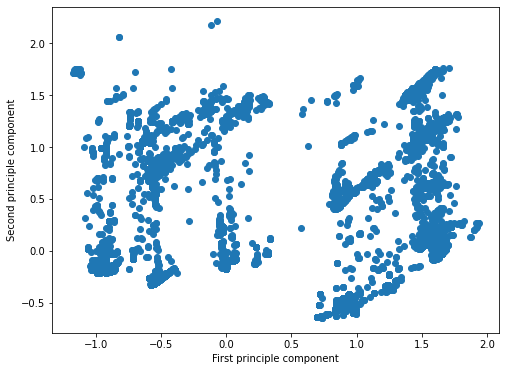

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0][:200000],x_pca[:,1][:200000])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

<h2>MODEL TRAINING</h2>

In [56]:
x_pca = x_pca.reshape(len(x_pca), 18, 1)
y_pca = np.array(output_label)

In [57]:
x_pca, y_pca = shuffle(x_pca, y_pca)

In [58]:
inp_train, inp_test, out_train, out_test = train_test_split(x_pca, y_pca, test_size = 0.2)

In [59]:
model = keras.Sequential([
    layers.Input(shape = (18, 1)),
    layers.Conv1D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(pool_size = 3),
    layers.Conv1D(filters = 16, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(pool_size = 3),
    layers.Flatten(),
    layers.Dense(units = 2, activation = "softmax")
])

In [60]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate= 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [61]:
treino = model.fit(x = inp_train, y = out_train, validation_split= 0.1, epochs = 5, shuffle = True,verbose = 1)

Epoch 1/5
23502/23502 [==============================] - 26s 1ms/step - loss: 0.0433 - accuracy: 0.9844 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 2/5
23502/23502 [==============================] - 24s 1ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 3/5
23502/23502 [==============================] - 25s 1ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 4/5
23502/23502 [==============================] - 24s 1ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 5/5
23502/23502 [==============================] - 24s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9997


In [62]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [63]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [64]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[151688     78]
 [    12  57127]]


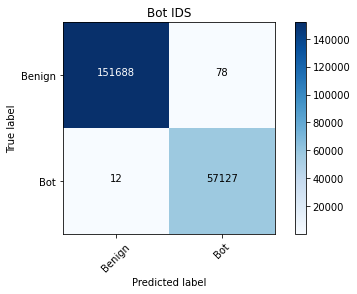

In [65]:
labels = ["Benign", "Bot"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Bot IDS")

In [66]:
model.save("CNN1BotNet(02-03-2018)PCA2.h5")